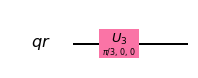

In [4]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
svs = BasicAer.get_backend("statevector_simulator")
em = BasicAer.get_backend('qasm_simulator')

def makecircuit(theta, phi, lam): 
    qr = QuantumRegister(1, 'qr')
    qc = QuantumCircuit(qr)
    qc.u3(theta, phi, lam, qr)
    return qc
    
def sv(qc): 
    job = execute(qc, svs)
    res = job.result()
    print(res.get_statevector())
    
def addmeasure(qc): 
    cr = ClassicalRegister(1, 'cr')
    qc.add_register(cr)
    qc.measure(qc.qregs[0], qc.cregs[0])
    return qc

def sim(qc): 
    job = execute(qc, em, shots=2000)
    res = job.result()
    return res.get_counts()

qc = makecircuit(np.pi/3, 0, 0)
#print(qc.qregs[0](theta, t))
qc.draw(output = "mpl")

In [5]:
sv(qc)

[0.8660254+0.j 0.5      +0.j]


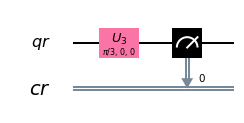

In [6]:
qc = addmeasure(qc)
qc.draw(output = "mpl")

In [7]:
counts = sim(qc)
print(counts)

{'1': 504, '0': 1496}


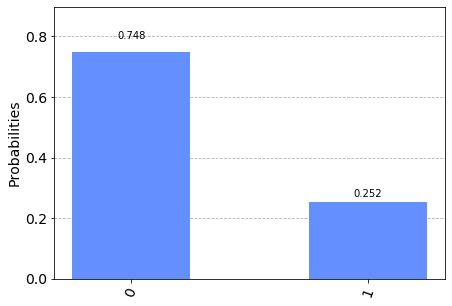

In [8]:
plot_histogram(counts)